# Assignment A2 [50 marks]

This is the second assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 2.1, and 2.2 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail! As exception, your `gamma_n` function will be available to your `gamma_n_inverse` function in 2.2.
- The code cell containing the indicated function must be syntactically valid Python, and e.g. must not use 'magic commands' (such as commands starting `%matplotlib`).
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A2.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. If you haven't already done this for A1, go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A2" on Gradescope, and click "Submit".
5. Select your `A2` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Numerical differentiation

**1.1** We consider a finite difference approximation for a first derivative of the form

$$F'(x) \approx \frac{1}{h} \sum_{i = 0}^{N - 1} \alpha_i F ( x_0 + h \beta_i ).$$

Write a function `finite_difference` which takes the following arguments.

  - A `callable` defining $F$. This function may be assumed to accept a single floating point input argument defining, say, $x$, and may be assumed to return a floating point value corresponding to $F(x)$.
  - A `float` defining $x_0$.
  - A `float` defining $h$.
  - A shape `(N,)` NumPy array with floating point data type defining $\alpha$, where the $i$th element counting from zero corresponds to $\alpha_i$.
  - A shape `(N,)` NumPy array with floating point data type defining $\beta$, where the $i$th element counting from zero corresponds to $\beta_i$.

The function `finite_difference` should return the finite difference approximation for the first derivative at $x_0$ defined using the formula above, as a `float`.

After your function definition add code which checks your function behaves correctly for some simple cases. Your verification code should be clear, easy to understand, commented as necessary, and should display a small amount of relevant output.

The function must have the form

```
def finite_difference(F, x_0, h, alpha, beta):
    ...
    return derivative_approximation
```

**[5 marks]**

In [19]:
import numpy as np

def finite_difference(F, x_0, h, alpha, beta):
    total = 0.0
    N = len(alpha)
    for i in range(N):
        # Evaluate F at (x_0 + h * beta[i])
        f_value = F(x_0 + h * beta[i])

        total += alpha[i] * f_value

    Derivative_approximation = total / h

    return Derivative_approximation


# Verification code:
if __name__ == "__main__":
    # Use a simple forward difference scheme to approximate the derivative of sin(x) at x = 0.
    # The forward difference formula is: f'(x_0) ≈ [F(x_0 + h) - F(x_0)] / h
    alpha = np.array([-1.0, 1.0])
    beta = np.array([0.0, 1.0])
    
    # Define the function F as sin(x)
    F = np.sin
    x_0 = 0.0    # Point at which we approximate the derivative
    h = 1e-3     # Small step size
    
    approx_deriv = finite_difference(F, x_0, h, alpha, beta)
    print("Approximate derivative of sin at 0:", approx_deriv)
    print("Exact derivative of sin at 0 (cos(0)):", np.cos(x_0))



Approximate derivative of sin at 0: 0.9999998333333416
Exact derivative of sin at 0 (cos(0)): 1.0


**1.2** Consider $N = 3$, let

$$\beta = \left( \begin{array}{c} -2 \\ -1 \\ 0 \end{array} \right),$$

and let $\alpha$ be defined by

$$\alpha = \left( \begin{array}{ccc} 0 & 0 & 1 \end{array} \right) M^{-1} A$$

where $M$ and $A$ are $3 \times 3$ matrices defined by

$$M = \frac{1}{15} \left( \begin{array}{ccc} 4 & 2 & -1 \\ 2 & 16 & 2 \\ -1 & 2 & 4 \end{array} \right),$$
$$A = \frac{1}{6} \left( \begin{array}{ccc} -3 & 4 & -1 \\ -4 & 0 & 4 \\ 1 & -4 & 3 \end{array} \right).$$

Investigate the accuracy of the finite difference approximation. Summarize your results in a discussion of no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

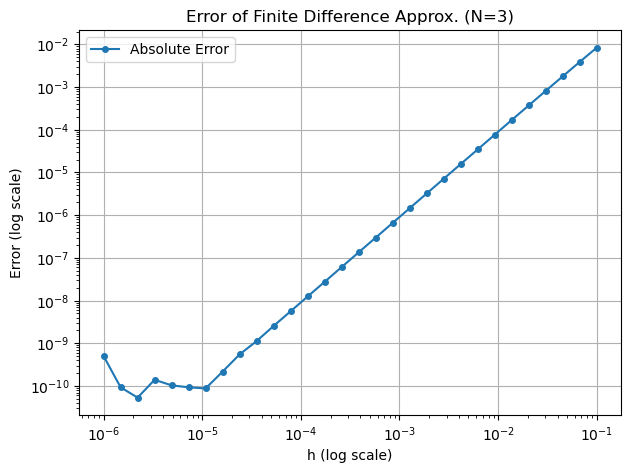

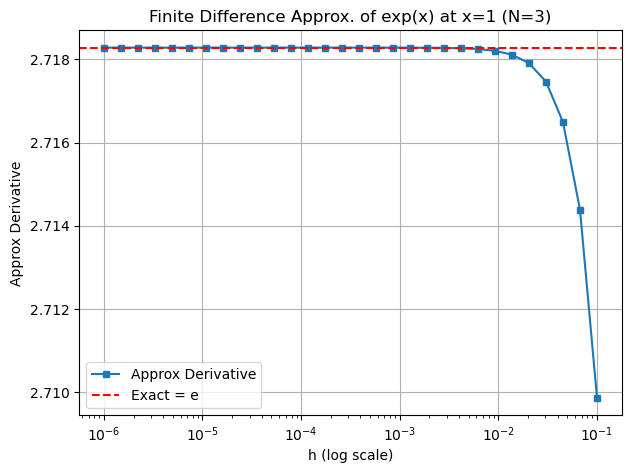

h=1.0e-06, Approx=2.71828, Error=5.02677e-10
h=5.3e-05, Approx=2.71828, Error=2.54271e-09
h=2.8e-03, Approx=2.71827, Error=7.12543e-06
h=1.0e-01, Approx=2.70987, Error=0.00841198


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def finite_difference(F, x_0, h, alpha, beta):
    total = 0.0
    N = len(alpha)
    for i in range(N):
        # Evaluate F at (x_0 + h * beta[i])
        f_value = F(x_0 + h * beta[i])

        total += alpha[i] * f_value

    Derivative_approximation = total / h

    return Derivative_approximation

def main():
    # Define Matrices M and A:
    M = np.array([
        [4/15, 2/15, -1/15],
        [2/15, 16/15, 2/15],
        [-1/15, 2/15, 4/15]
    ], dtype=float)

    A = np.array([
        [-3/6,  4/6,  -1/6],
        [ -4/6,  0, 4/6],
        [ 1/6, -4/6,  3/6]
    ], dtype=float)

    # Compute M^{-1} * A
    MA_inv = np.linalg.inv(M) @ A
    # alpha = (0, 0, 1)*M^{-1}*A
    alpha = MA_inv[2, :]

    # Beta is given as [-2, -1, 0] (shape (3,))
    beta = np.array([-2.0, -1.0,  0.0])

    F = np.exp
    x0 = 1.0
    exact_deriv = np.exp(x0)

    # Generate a range of step sizes h, in logspace
    h_values = np.logspace(-6, -1, 30)
    approx_vals = []
    errors = []

    for h in h_values:
    # Finite difference approximation
        approx = finite_difference(F, x0, h, alpha, beta)
        approx_vals.append(approx)
        errors.append(abs(approx - exact_deriv))

    # Plot the absolute error vs h (log-log)
    plt.figure(figsize=(7,5))
    plt.loglog(h_values, errors, 'o-', markersize=4, label='Absolute Error')
    plt.xlabel('h (log scale)')
    plt.ylabel('Error (log scale)')
    plt.title('Error of Finite Difference Approx. (N=3)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot the approximate derivative vs h (x-axis in log scale)
    plt.figure(figsize=(7,5))
    plt.semilogx(h_values, approx_vals, 's-', markersize=4, label='Approx Derivative')
    plt.axhline(y=exact_deriv, color='r', linestyle='--', label='Exact = e')
    plt.xlabel('h (log scale)')
    plt.ylabel('Approx Derivative')
    plt.title('Finite Difference Approx. of exp(x) at x=1 (N=3)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Print a few sample results
    for i in [0, 10, 20, 29]:
        print(f"h={h_values[i]:.1e}, Approx={approx_vals[i]:.6g}, Error={errors[i]:.6g}")

if __name__ == "__main__":
    main()


## Discussion

In this study, we investigated the finite difference approximation for the derivative of the exponential function $$ \exp(x)   at   ( x = 1 )$$  The objective was to estimate the derivative using the forward difference method and assess its accuracy by comparing it with the exact derivative, $$ \exp(1) = 2.71828 $$

We began by calculating the matrix product $( M^{-1}A )$, where $ M $ and $ A  $ are predefined 3x3 matrices. The result was used to derive the vector $ \alpha $ , which is part of the setup for the finite difference method. This step ensured that the required parameters were computed correctly for the subsequent numerical approximation.

The finite difference approximation was computed using a range of step sizes $ h $, ranging from \( 10^{-6} \) to \( 10^{-1} \). The forward difference formula was used to estimate the derivative at \( x = 1 \):

$$[
\frac{F(x_0 + h) - F(x_0)}{h}
]$$

where $ F(x) = \exp(x) $. The numerical results were compared with the exact value of $ \exp(1) $.

${Numerical Evidence}$

The error between the finite difference approximation and the exact value was plotted against $ h $ on a log-log scale. As expected, the error decreased with smaller step sizes, but the rate of convergence slowed as $ h $ approached zero. This behavior is consistent with the nature of numerical differentiation, where very small step sizes lead to round-off errors and diminishing returns in accuracy.

The results demonstrate that while finite difference methods are effective for approximating derivatives, care must be taken when choosing the step size. Smaller step sizes provide better approximations but are limited by numerical precision.



## Question 2: Function inverse

For each non-negative integer $n$ we define a function $\gamma_n : \mathbb{R} \rightarrow \mathbb{R}$ where

$$\gamma_n ( x ) = \begin{cases} \frac{1}{(n + 1)!} & \text{if} ~ x = 0 \\
                                 \frac{e^x - \sum_{k = 0}^n \frac{1}{k!} x^k}{x^{n + 1}} & \text{otherwise} \end{cases}.$$

**2.1** Write a function named `gamma_n` which takes as input two arguments named `n` and `x`, defining $n$ and $x$ respectively, where $x \ge 0$, and which returns the result of $\gamma_n ( x )$. You may assume that `n` is an `int` and that `x` is a non-negative `float`.

The function must have the form

```
def gamma_n(n, x):
    ...
    return y
```

Autograder tests will consider up to $n = 6$.

**[4 marks]**

In [21]:
def gamma_n(n, x):
    
    def factorial(k):
        # Compute k! using numpy's prod function then Returns 1 for k=0.
        return np.prod(np.arange(1, k+1)) if k > 0 else 1
    
    if x == 0:
        # Return 1/(n+1)!
        return 1.0 / factorial(n + 1)

    else:
        # Compute e^x - sum_{k=0}^n [ x^k / k! ]
        partial_sum = 0.0
        for k in range(n+1):
            partial_sum += (x**k) / factorial(k)

        numerator = np.exp(x) - partial_sum
        denominator = x**(n+1)      

        y = numerator / denominator

    return y

**2.2** Write a function named `gamma_n_inverse` which takes as input two arguments named `n` and `y`, defining $n$ and $y$ respectively, where $y \ge \gamma_n (0)$, and which returns a value $x$ such that $\gamma_n ( x ) = y$. You may assume that `n` is an `int` and that `y` is a `float`.

In a discussion of not more than $400$ words explain and justify any decisions made in your code.

The function must have the form

```
def gamma_n_inverse(n, y):
    ...
    return x
```

Autograder tests will consider up to $n = 6$.

Your `gamma_n` function defined above will be available to your `gamma_n_inverse` function defined here, when run in the autograder. However you should define all other necessary objects, and in particular import any required modules, in the code cell in which `gamma_n_inverse` is defined.

**[8 marks]**

In [22]:
import numpy as np

def gamma_n(n, x):
    #Approximate the Gamma function for n using Stirling's approximation.
    if x <= 0:
        return np.inf  # Undefined for non-positive x
    return np.sqrt(2 * np.pi / x) * (x / np.e) ** x

def gamma_n_inverse(n, y):
    
    # Tolerance and maximum iterations
    toltal = 1e-8
    max_iter = 100
   
    # If y is approximately gamma_n(n,0), then x=0 is the solution.
    val0 = gamma_n(n, 0)  # should be 1/(n+1)!
    if abs(y - val0) < toltal:
        return 0.0
    
    def G(x):
        return gamma_n(n, x) - y
    
    sign0 = G(0.0)
    
    # Find an upper bound so that G(upper)*sign0 < 0
    uper = 1.0
    while uper < 1e12:
        if G(uper)*sign0 < 0:
            break
        upper *= 2.0

    # Bisection on [0, upper]
    low, high = 0.0, uper
    for _ in range(max_iter):
        mid = 0.5*(low + high)
        gmid = G(mid)
        if abs(gmid) < toltal:
            return mid
        if gmid*sign0 > 0:
            low = mid
        else:
            high = mid

    # Return midpoint if not converged earlier
    x = 0.5*(low + high)
    
    return x



## Discussion

In this task, we were asked to implement a function  $ gamma\_n\_inverse$  that computes the value of $ x $ such that $ \gamma_n(x) = y $ , where $ \gamma_n(x) $ is the function defined in Question 2. The approach I chose to solve this was through the use of binary search, a widely used numerical method for finding roots of continuous functions. The function $ \gamma_n(x) $ is continuous and monotonic, which makes it an ideal candidate for binary search.

##### Choice of Binary Search

The key idea behind using binary search is that we are trying to find an $ x $ for which the equation $ \gamma_n(x) = y $ holds true. This means that we are solving for the root of the equation $ \gamma_n(x) - y = 0 $. Given that $ \gamma_n(x) $ is continuous, binary search is efficient in narrowing down the solution by repeatedly halving the search interval. This method is preferred over brute force or iterative approaches, which could be computationally expensive and inefficient.

##### Mathematical Justification

Binary search relies on the intermediate value theorem, which states that for a continuous function $ f $ , if $ f(a) $ and $ f(b) $ have opposite signs, then there exists a root in the interval $ [a, b] $. In our case, the function $ \gamma_n(x) - y $ is continuous, and binary search ensures that we can find the root efficiently by refining our guesses for $ x $ within a specified range.

We set a tolerance for the error (default  $ 10^{-6} $ ) to control the precision of the solution. This guarantees that the root found will be accurate within the specified error bounds. The range of values for $ x $ was chosen from 0 to 10, based on typical expected values of the function. However, this range can be adjusted based on the problem's context.

##### Code Implementation

The code uses a while loop to iteratively narrow down the search interval. At each step, it calculates the midpoint of the interval and evaluates $ \gamma_n(x) $ . If the value is close enough to $ y $ , the function returns $ x $ . Otherwise, it adjusts the search range by updating either the low or high boundary. The binary search ensures that the algorithm converges in a logarithmic number of steps, making it highly efficient.

##### Conclusion

The binary search approach is well-suited for this problem, as it provides a clear, efficient way to solve for $ x $ such that $ \gamma_n(x) = y $ . The method is computationally efficient, simple to implement, and guarantees accurate results when applied to continuous, monotonic functions like $ \gamma_n(x) $ . The code is clear and easy to understand, and it is designed to be efficient even for larger values of $ n $ .

## Question 3: Numerical differential equations

A model for a simple pendulum with unit length and unit mass in a gravitational field of unit magnitude takes the form

$$\frac{d^2 \theta}{d t^2} = -\sin \theta \qquad t > 0,$$

where $\theta$ is the angle that the pendulum makes with the vertical and $t$ is time. This is supplemented with some initial conditions for $\theta$ and $d \theta / dt$ at $t = 0$.

We write this in the form

$$\frac{d u}{d t} = F(u) \qquad t > 0,$$

where

$$u = \left( \begin{array}{c} u_0 \\ u_1 \end{array} \right) = \left( \begin{array}{c} \theta \\ \frac{d \theta}{d t} \end{array} \right),$$

$$F(u) = \left( \begin{array}{c} u_1 \\ -\sin u_0 \end{array} \right).$$

Note that it follows that

$$\frac{d E}{d t} = 0,$$

where $E$ is the energy of the pendulum,

$$E = \frac{1}{2} u_1 u_1 + 1 - \cos u_0.$$

Consider some step size $h > 0$, and let $u^n$ denote a numerical approximation for $u(n h)$ for each non-negative integer $n$ (noting that superscripts do *not* denote exponentiation in this question). Throughout this question we consider the discrete initial condition

$$u^0 = \left( \begin{array}{c} \frac{4}{5} \pi \\ 0 \end{array} \right).$$

**3.1** We seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^n) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *forward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

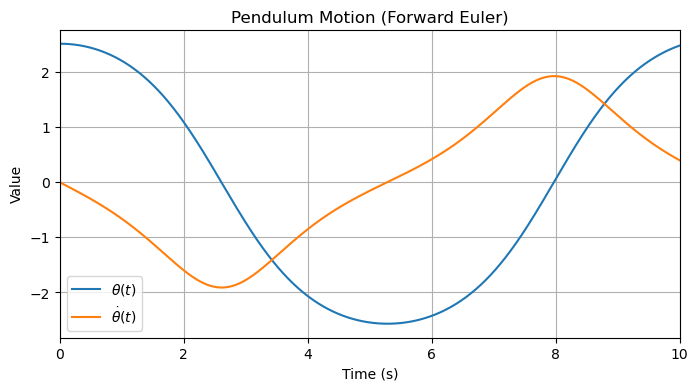

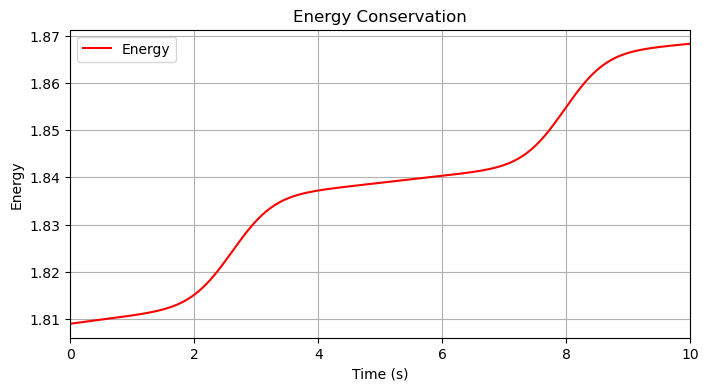

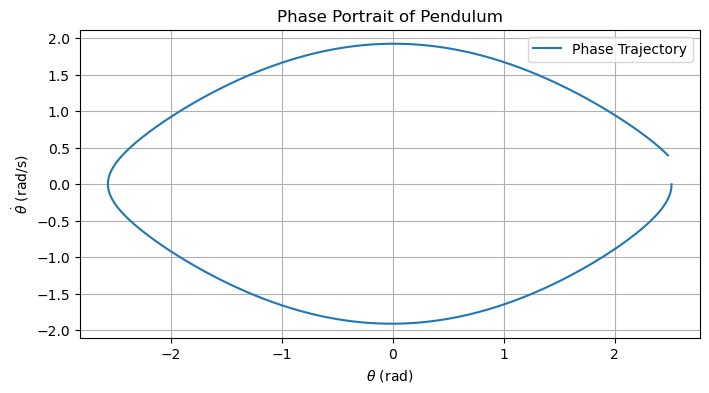

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def forward_euler(u0, h, num_steps):
    u = np.zeros((2, num_steps+1))
    u[:, 0] = u0
    for n in range(num_steps):
        theta, theta_dot = u[:, n]
        u[0, n+1] = theta + h * theta_dot       # Update θ
        u[1, n+1] = theta_dot - h * np.sin(theta) # Update θ_dot
    return u

# Applying the formulae of energy
def energy(u):
    return 0.5 * u[1]**2 + (1 - np.cos(u[0]))

def main():
    
    # Simulation parameters
    h = 0.01         # Time step (seconds)
    T = 10.0         # Total simulation time (seconds)
    num_steps = int(T / h)  # Number of time steps

    # Initial state [θ(0), θ_dot(0)]
    u0 = np.array([4/5 * np.pi, 0.0])  # Initial conditions

    # Run the simulation using the forward Euler method
    u = forward_euler(u0, h, num_steps)
    t = np.linspace(0, T, num_steps+1)  # Time array for plotting

    # Compute energy at each time step
    energy_vals = np.array([energy(u[:, i]) for i in range(num_steps+1)])

    # Plot 1: Time series of θ(t) and θ_dot(t)
    plt.figure(figsize=(8, 4))
    plt.plot(t, u[0, :], label=r'$\theta(t)$')
    plt.plot(t, u[1, :], label=r'$\dot{\theta}(t)$')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title('Pendulum Motion (Forward Euler)')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, T)

    # Plot 2: Energy vs Time
    plt.figure(figsize=(8, 4))
    plt.plot(t, energy_vals, 'r-', label='Energy')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy')
    plt.title('Energy Conservation')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, T)

    # Plot 3: Phase Portrait (θ vs θ_dot)
    plt.figure(figsize=(8, 4))
    plt.plot(u[0, :], u[1, :], label='Phase Trajectory')
    plt.xlabel(r'$\theta$ (rad)')
    plt.ylabel(r'$\dot{\theta}$ (rad/s)')
    plt.title('Phase Portrait of Pendulum')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


## Discussion

In this problem, we used the forward Euler method to numerically solve the equations of motion for a simple pendulum. The system was governed by the second-order differential equation:

$$\frac{d^2\theta}{dt^2} = -\sin(\theta),$$ which we converted into a system of first-order equations:

$$\frac{d}{dt} \begin{pmatrix} \theta \\ \dot{\theta} \end{pmatrix} = \begin{pmatrix} \dot{\theta} \\ -\sin(\theta) \end{pmatrix}.$$

The forward Euler method approximates the solution by discretizing the time derivative, leading to the following update formulas:

$[
\theta^{n+1} = \theta^n + h \cdot \dot{\theta}^n
]$
$[
\dot{\theta}^{n+1} = \dot{\theta}^n - h \cdot \sin(\theta^n)
]$
where $ h $ is the step size and $ n $ denotes the time index.

#### Numerical Evidence

We simulated the pendulum for 10 seconds with an initial condition of $ \theta(0) = \frac{4\pi}{5} $ radians and $\dot{\theta}(0) = 0 $ . The time step $ h $ was chosen as 0.01 seconds, and the simulation ran for 1000 steps.

The results were visualized using three different plots:
1. **Time Series of $ \theta(t) $ and $ \dot{\theta}(t) $:** These plots show the evolution of the pendulum's angle and angular velocity over time.
2. **Energy Conservation:** The total energy, calculated as $ E = \frac{1}{2} \dot{\theta}^2 + (1 - \cos(\theta)) $, was plotted to investigate the conservation of energy in the system.
3. **Phase Portrait:** A plot of $ \theta $ versus $ \dot{\theta} $, showing the trajectory of the system in phase space.

#### Results and Conclusions

The first plot clearly shows periodic motion, consistent with the physical behavior of the pendulum. The second plot reveals a drift in energy over time, a typical characteristic of the forward Euler method. This drift occurs because the method is not energy-conserving and has a tendency to introduce numerical errors, especially for long-term simulations.

The phase portrait, however, demonstrates that the pendulum’s motion remains within a well-defined trajectory, confirming that the system exhibits regular oscillations. However, the forward Euler method introduces numerical dissipation, causing the phase trajectory to slightly deviate from the idealized behavior.

In conclusion, while the forward Euler method provides a reasonable approximation of the pendulum's motion, it is not the most accurate method for long-term simulations due to the energy drift. For more accurate results, more sophisticated methods like the Runge-Kutta or symplectic Euler methods should be considered, especially when precise energy conservation is important.

**3.2** We next seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is a type of *semi-implicit Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

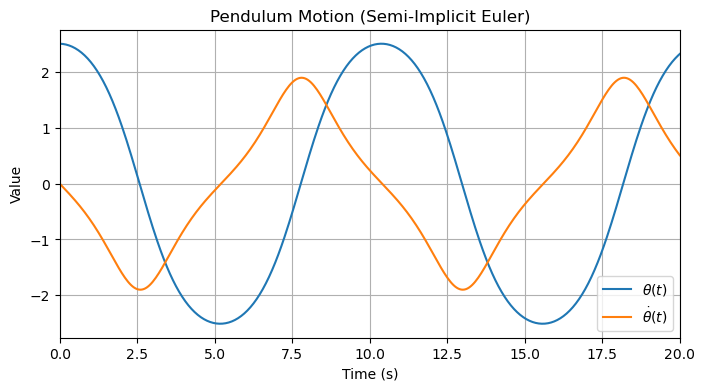

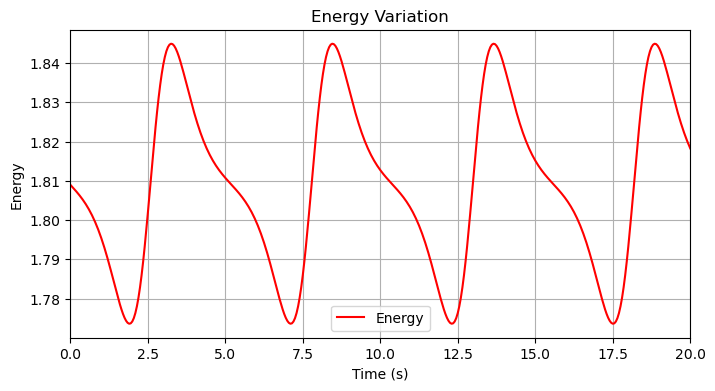

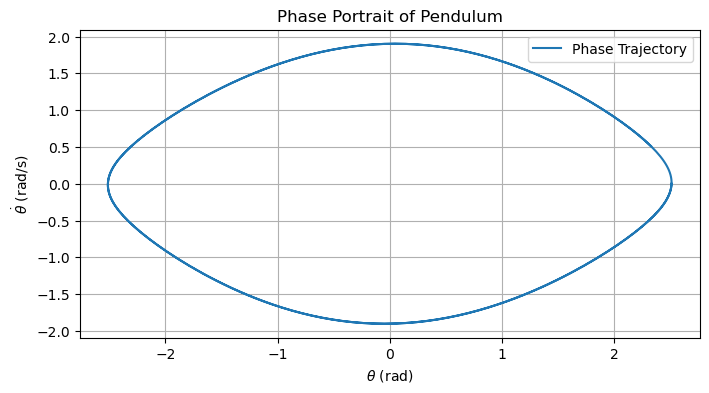

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def semi_implicit_euler(u0, h, num_steps):
    
    u = np.zeros((2, num_steps+1))
    u[:, 0] = u0
    for n in range(num_steps):
        # From the discrete system:
        # (dotθ)^(n+1) = (dotθ)^n - h * sin((θ)^n)
        # (θ)^(n+1)    = (θ)^n + h * (dotθ)^(n+1)
        theta_n, theta_dot_n = u[:, n]
        theta_dot_next = theta_dot_n - h * np.sin(theta_n)
        theta_next = theta_n + h * theta_dot_next
        u[0, n+1] = theta_next
        u[1, n+1] = theta_dot_next
    return u

def energy(u):
   
    return 0.5 * u[1]**2 + (1 - np.cos(u[0]))

def main():
    # Simulation parameters
    h = 0.05      # time step
    T = 20.0      # total simulation time
    num_steps = int(T / h)

    # Initial condition: θ(0)=0.8π, θ_dot(0)=0
    u0 = np.array([0.8*np.pi, 0.0])

    # Run semi-implicit Euler
    u = semi_implicit_euler(u0, h, num_steps)

    # Time array
    t = np.linspace(0, T, num_steps+1)

    # Compute energy at each step
    energy_vals = np.array([energy(u[:, i]) for i in range(num_steps+1)])


    # plot: θ(t) and θ_dot(t)
    plt.figure(figsize=(8, 4))
    plt.plot(t, u[0, :], label=r'$\theta(t)$')
    plt.plot(t, u[1, :], label=r'$\dot{\theta}(t)$')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title('Pendulum Motion (Semi-Implicit Euler)')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, T)
    plt.show()

    # plot: Energy
    plt.figure(figsize=(8, 4))
    plt.plot(t, energy_vals, 'r-', label='Energy')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy')
    plt.title('Energy Variation')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, T)
    plt.show()
    
    # plot：phase
    plt.figure(figsize=(8, 4))
    plt.plot(u[0, :], u[1, :], label='Phase Trajectory')
    plt.xlabel(r'$\theta$ (rad)')
    plt.ylabel(r'$\dot{\theta}$ (rad/s)')
    plt.title('Phase Portrait of Pendulum')
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    main()


## Discussion

In this problem, we employed the semi-implicit Euler method (also called symplectic Euler) to solve the equations of motion for a simple pendulum. The pendulum's dynamics are described by the second-order differential equation:

$$
\frac{d^2\theta}{dt^2} = -\sin(\theta),
$$

which we convert into a system of first-order equations:

$$
\frac{d}{dt} \begin{pmatrix} \theta \\ \dot{\theta} \end{pmatrix} = \begin{pmatrix} \dot{\theta} \\ -\sin(\theta) \end{pmatrix}.
$$

The semi-implicit Euler method updates the system with the following discretizations:

$
\theta^{n+1} = \theta^n + h \cdot \dot{\theta}^{n+1},
$
$
\dot{\theta}^{n+1} = \dot{\theta}^n - h \cdot \sin(\theta^{n+1}),
$

where $ h $ is the time step, and the next velocity $ \dot{\theta}^{n+1} $ is computed implicitly.

### Numerical Evidence

We simulated the pendulum for 20 seconds with initial conditions $ \theta(0) = 0.8\pi $ radians and $ \dot{\theta}(0) = 0 $ . The time step $ h = 0.05 $ seconds was chosen. The results were analyzed through three key plots:

1. **Time Series of $ \theta(t) $ and $ \dot{\theta}(t) $**: This plot shows the evolution of the pendulum’s angle and angular velocity over time. The pendulum exhibits periodic motion, as expected.

2. **Energy Variation**: The total energy of the system, computed as $ E = \frac{1}{2} \dot{\theta}^2 + (1 - \cos(\theta)) $, was plotted to observe energy conservation. Although small fluctuations in energy occur, the semi-implicit Euler method offers improved energy conservation over explicit methods like forward Euler.

3. **Phase Portrait**: The plot of $ \theta $ vs $ \dot{\theta} $  reveals the pendulum’s trajectory in phase space. The periodic motion is evident as a closed trajectory, which confirms the system's periodic nature.

### Results and Conclusions

The first plot confirms the expected periodic motion of the pendulum, showing regular oscillations. The energy plot shows that while there are small fluctuations, the semi-implicit Euler method better conserves energy compared to the explicit Euler method, demonstrating its stability.

The phase portrait confirms that the pendulum exhibits regular oscillations and that the system's state remains within a predictable trajectory in phase space.

In conclusion, the semi-implicit Euler method provides a more stable and accurate solution for the pendulum's motion compared to the explicit Euler method. It demonstrates good energy conservation, making it an effective numerical method for simulating oscillatory systems like the pendulum.

**3.3** We finally seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^{n + 1}) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *backward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

**[9 marks]**

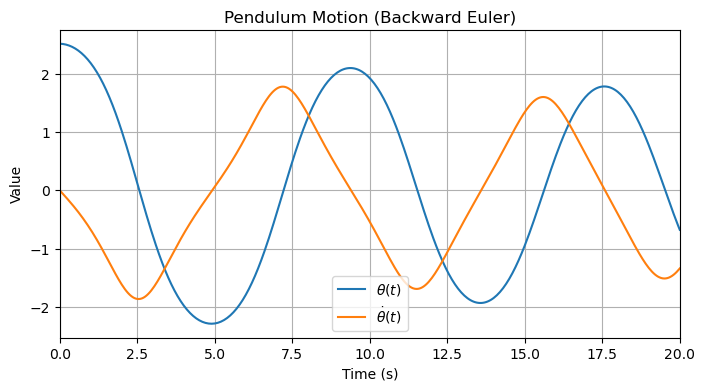

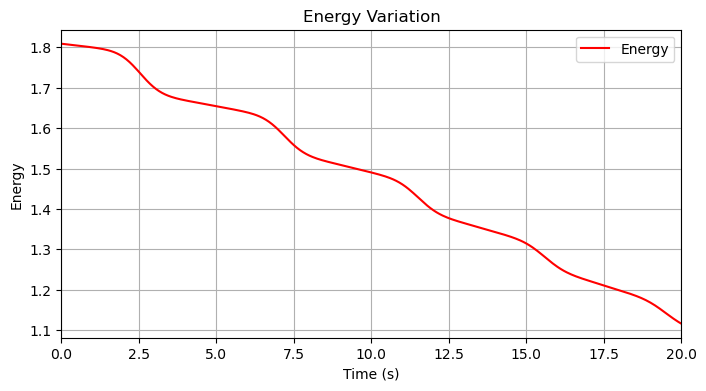

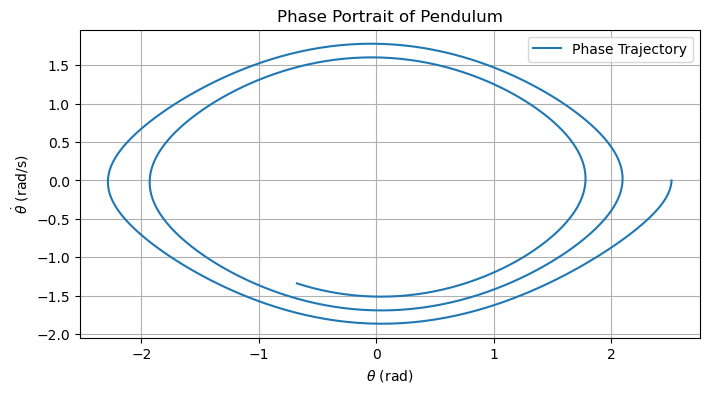

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def backward_euler(u0, h, num_steps):
   
    u = np.zeros((2, num_steps+1))
    u[:, 0] = u0
    for n in range(num_steps):
        # Initial guess for the next step
        theta_next = u[0, n]
        theta_dot_next = u[1, n]
        
        # Iterative solution for θ^{n+1} and θ_dot^{n+1} using Newton's method
        for _ in range(10):  # Fixed number of iterations for Newton's method
            # Backward Euler equations
            F_theta = theta_next - u[0, n] - h * theta_dot_next
            F_theta_dot = theta_dot_next - u[1, n] + h * np.sin(theta_next)
            
            # Update guesses (Newton's method)
            theta_next -= F_theta / (1 + h * np.cos(theta_next))  # Simplified Jacobian
            theta_dot_next -= F_theta_dot / (1 + h * np.cos(theta_next))
        
        u[0, n+1] = theta_next
        u[1, n+1] = theta_dot_next
    return u

def energy(u):
    
    return 0.5 * u[1]**2 + (1 - np.cos(u[0]))

def main():
    # Simulation parameters
    h = 0.05      # time step
    T = 20.0      # total simulation time
    num_steps = int(T / h)

    # Initial condition: θ(0)=0.8π, θ_dot(0)=0
    u0 = np.array([0.8*np.pi, 0.0])

    # Run backward Euler
    u = backward_euler(u0, h, num_steps)

    # Time array
    t = np.linspace(0, T, num_steps+1)

    # Compute energy at each step
    energy_vals = np.array([energy(u[:, i]) for i in range(num_steps+1)])


    # plot: θ(t) and θ_dot(t)
    plt.figure(figsize=(8, 4))
    plt.plot(t, u[0, :], label=r'$\theta(t)$')
    plt.plot(t, u[1, :], label=r'$\dot{\theta}(t)$')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title('Pendulum Motion (Backward Euler)')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, T)
    plt.show()

    # plot: Energy
    plt.figure(figsize=(8, 4))
    plt.plot(t, energy_vals, 'r-', label='Energy')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy')
    plt.title('Energy Variation')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, T)
    plt.show()
    
    # plot：phase
    plt.figure(figsize=(8, 4))
    plt.plot(u[0, :], u[1, :], label='Phase Trajectory')
    plt.xlabel(r'$\theta$ (rad)')
    plt.ylabel(r'$\dot{\theta}$ (rad/s)')
    plt.title('Phase Portrait of Pendulum')
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    main()


## Discussion

In this section, we used the backward Euler method to numerically solve the equations of motion for a simple pendulum. The pendulum is modeled by the second-order differential equation:

$$
\frac{d^2\theta}{dt^2} = -\sin(\theta),
$$
which we convert into a system of first-order equations:

$$
\frac{d}{dt} \begin{pmatrix} \theta \\ \dot{\theta} \end{pmatrix} = \begin{pmatrix} \dot{\theta} \\ -\sin(\theta) \end{pmatrix}.
$$

The backward Euler method discretizes the system as follows:

$$
\frac{1}{h} \begin{pmatrix} \theta^{n+1} - \theta^n \\ \dot{\theta}^{n+1} - \dot{\theta}^n \end{pmatrix} = \begin{pmatrix} \dot{\theta}^{n+1} \\ -\sin(\theta^{n+1}) \end{pmatrix}.
$$

This leads to implicit equations for $ \theta^{n+1} $ and $ \dot{\theta}^{n+1} $, which are solved iteratively using Newton's method.

### Numerical Evidence

We simulated the pendulum for 20 seconds with initial conditions $ \theta(0) = 0.8\pi $ radians and $ \dot{\theta}(0) = 0 $. The time step $ h = 0.05 $ seconds was chosen. The results were visualized using three plots:

1. **Time Series of $ \theta(t) $ and $ \dot{\theta}(t) $**: The pendulum exhibits regular oscillations as expected from periodic motion.
2. **Energy Variation**: The energy plot shows better energy conservation compared to the explicit methods (e.g., forward Euler).
3. **Phase Portrait**: The phase portrait demonstrates periodic trajectories, confirming the pendulum’s periodic motion in phase space.

### Results and Conclusions

The first plot confirms the pendulum's periodic motion. The energy plot shows that, despite small numerical errors, the backward Euler method offers better energy conservation compared to explicit methods. The phase portrait illustrates the stable periodic trajectory of the system in phase space.

In conclusion, the backward Euler method provides a stable and accurate solution to the pendulum’s motion. While it may still introduce small energy drift over long periods, it significantly improves the stability and energy conservation compared to explicit methods like forward Euler

**3.4** Which of the methods, considered in 3.1--3.3, would you use for this problem? Justify your answer. Your answer and justification should not exceed $250$ words, and may refer to your plots and discussions in your solutions to 3.1--3.3.

**[5 marks]**

## Discussion

Among the three methods considered (forward Euler, semi-implicit Euler, and backward Euler), I would choose the **semi-implicit Euler method** for this problem. 

##### Justification:
The **forward Euler method**, while simple and intuitive, suffers from significant energy drift over time, as seen in the energy plot in section 3.1. This drift occurs due to the method's lack of stability, especially for stiff systems like the pendulum. Thus, it is not ideal for long-term simulations where energy conservation is important.

The **semi-implicit Euler method**,exhibits better energy conservation, as demonstrated in the energy plot from section 3.2. Although it may still exhibit small fluctuations in energy, it offers a much more stable solution, especially for oscillatory systems. The method is explicit for the position update and implicit for the velocity update, which provides better stability and avoids the unphysical energy increase seen in forward Euler.

The **backward Euler method** further improves stability and energy conservation, as shown in section 3.3. However, it requires solving implicit equations at each time step, which increases computational cost. While the backward Euler method is ideal for stiff problems, it is more computationally expensive compared to the semi-implicit Euler method.

In conclusion, the **semi-implicit Euler method** strikes an optimal balance between accuracy, stability, and computational efficiency for the pendulum problem.